In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# cd '/content/drive/MyDrive/khuton'

/content/drive/MyDrive/khuton


In [ ]:
!apt-get install tesseract-ocr
!pip install pytesseract
!sudo apt install tesseract-ocr
!sudo apt install tesseract-ocr-kor


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-kor is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('/content/나균2.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

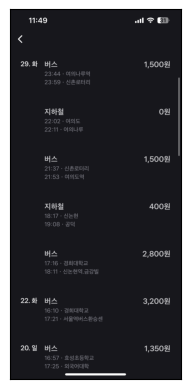

In [ ]:
plt.xticks([])
plt.yticks([])
plt.imshow(img)

In [ ]:
result = pytesseract.image_to_string(img, lang = 'kor')
print(result)

이                           1 = 6

어어 은                               개커00인
23:44ㆍ여의나루역
<보매사드커= 2

지하철                                    /인
22:02ㆍ여의도
22:11ㆍ여의나루
버스                                 1.500원
21:37ㆍ신촌로터리
21:53ㆍ여의도역
지하철                                 400원
18:17ㆍ신논현
19:08ㆍ공덕
무려                                2,800원
17:16ㆍ경희대학교
:배바그이언븐|

22.화 버스                               내고
16:10ㆍ경희대학교
17:21ㆍ서울역버스환승센

오어 은                               1350원

[007사두타

00000 2



In [ ]:
import re
import pandas as pd

text = result

# 출발시간, 도착시간, 출발지, 도착지를 저장할 리스트
departure_times = []
arrival_times = []
start_stations = []
end_stations = []

# 정규식 패턴 정의
pattern = r'(\d{2}:\d{2})ㆍ(.+)'

# 텍스트에서 패턴과 일치하는 부분을 찾아 출발시간, 도착시간, 출발지, 도착지를 추출
matches = re.findall(pattern, text)
for i, match in enumerate(matches):
    if i % 2 == 0:  # 홀수번째: 출발지
        departure_times.append(match[0])
        start_stations.append(match[1])
    else:  # 짝수번째: 도착지
        arrival_times.append(match[0])
        end_stations.append(match[1])

# 데이터프레임 생성
df = pd.DataFrame({
    '출발시간': departure_times,
    '도착시간': arrival_times,
    '출발지': start_stations,
    '도착지': end_stations
})

# 결과 출력
df

,출발시간,도착시간,출발지,도착지
0,23:44,22:02,여의나루역,여의도
1,22:11,21:37,여의나루,신촌로터리
2,21:53,18:17,여의도역,신논현
3,19:08,17:16,공덕,경희대학교
4,16:10,17:21,경희대학교,서울역버스환승센
